<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/xveganx_icon.png">
*This notebook contains ongoing research material from [gully](https://twitter.com/gully_); the content is available [on GitHub](https://github.com/BrownDwarf/xveganx).*


<!--NAVIGATION-->
< [IW Tau A, Enhanced processing](02.02-IWTau-A-Enhanced-processing.ipynb) | [Contents](Index.ipynb) | [Spectral inference with Starfish Mixture Models](03.00-Spectral-Inference-with-Starfish.ipynb) >

# V827 Manual IGRINS spectrum cleaning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [2]:
from astropy.io import fits
import h5py

## Set the date

In [3]:
date = 20141127

## H-Band

In [4]:
dir1 = '../data/raw/HLTau_for_gully/'
base = 'SDCH_20141127_'
num_A0V = '0084'
num_targ = '0088'
hdu_raw = fits.open(dir1+base+num_A0V+'.spec.fits')
#hdu_f   = fits.open(dir1+base+num_A0V+'.spec_flattened.fits')

temp   = fits.open(dir1+'A0V_divided/'+'HLTau_20141127_H.fits')
                   
hdu_var = fits.open(dir1+base+num_A0V+'.variance.fits')
hdu_tar = fits.open(dir1+base+num_targ+'.spec.fits')
tar_var = fits.open(dir1+base+num_targ+'.variance.fits')
hdr = hdu_tar[0].header

Use a stand-in file for the Vega model (which doesn't change)

In [5]:
hdu_f   = fits.open('../../gorey/data/raw/20161009/SDCH_20161009_0225.spec_flattened.fits')

### Do the telluric correction
$ f_{\star} = \frac{f_{raw, \star}}{f_{raw, std}} \times \hat{f}_{std}$

$ \sigma_{\star} = f_{\star} \sqrt{ \left( \frac{\sigma_{raw, std}}{f_{raw, std}}\right)^2 + \left( \frac{\sigma_{raw, \star}}{f_{raw,\star}} \right)^2 } \times \hat{f}_{std}$

In [6]:
f_hat_std = hdu_f[4].data/np.nanmean(hdu_f[4].data)
f_star = hdu_tar[0].data/hdu_raw[0].data*f_hat_std
term1 = hdu_var[0].data / hdu_raw[0].data**2
term2 = tar_var[0].data / hdu_tar[0].data**2
sig_star = f_star * np.sqrt( term1 + term2 )*f_hat_std

## Plot it

We will trim between pixel 450 and 1950.

(0.0, 1.2)

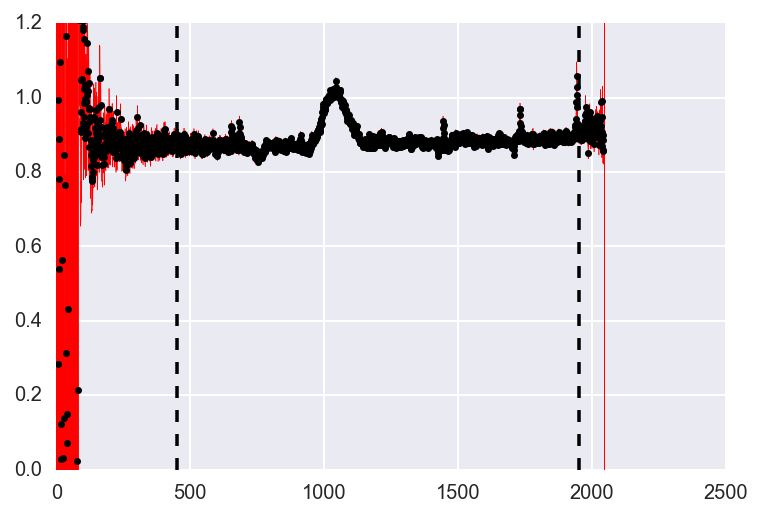

In [7]:
o=5
fls_out = f_star[o,:]
sig_out = sig_star[o,:]
wls_out = hdu_tar[1].data[o,:]*10000.0
sig = sig_out

pix = np.arange(2048)
plt.plot(pix, fls_out, 'k.')

plt.fill_between(pix, fls_out-sig, fls_out+sig, color='r')

plt.vlines(450, 0, 2, linestyles='--')
plt.vlines(1950, 0, 2, linestyles='--')
plt.ylim(0.0, 1.2)

In [15]:
#! mkdir ../data/reduced

In [9]:
lft = 450
rgt = 1950

for o in range(28):
    m = o + 98
    out_name = '../data/reduced/HLTau_IGRINS_{}_m{:03d}.hdf5'.format(date, m)
    fls_out = f_star[o,lft:rgt]
    sig_out = sig_star[o,lft:rgt]
    wls_out = hdu_tar[1].data[o,lft:rgt]*10000.0
    msk_out = np.ones(len(wls_out), dtype=int)
    f_new = h5py.File(out_name, 'w')
    f_new.create_dataset('fls', data=fls_out)
    f_new.create_dataset('wls', data=wls_out)
    f_new.create_dataset('sigmas', data=sig_out)
    f_new.create_dataset('masks', data=msk_out)
    print("{:03d}: {:.0f}  -  {:.0f}   {}".format(m, wls_out[0], wls_out[-1], out_name))
    f_new.close()

098: 18154  -  18335   ../data/reduced/HLTau_IGRINS_20141127_m098.hdf5
099: 17975  -  18155   ../data/reduced/HLTau_IGRINS_20141127_m099.hdf5
100: 17800  -  17978   ../data/reduced/HLTau_IGRINS_20141127_m100.hdf5
101: 17628  -  17805   ../data/reduced/HLTau_IGRINS_20141127_m101.hdf5
102: 17460  -  17635   ../data/reduced/HLTau_IGRINS_20141127_m102.hdf5
103: 17295  -  17468   ../data/reduced/HLTau_IGRINS_20141127_m103.hdf5
104: 17133  -  17305   ../data/reduced/HLTau_IGRINS_20141127_m104.hdf5
105: 16975  -  17145   ../data/reduced/HLTau_IGRINS_20141127_m105.hdf5
106: 16819  -  16988   ../data/reduced/HLTau_IGRINS_20141127_m106.hdf5
107: 16667  -  16834   ../data/reduced/HLTau_IGRINS_20141127_m107.hdf5
108: 16517  -  16682   ../data/reduced/HLTau_IGRINS_20141127_m108.hdf5
109: 16370  -  16534   ../data/reduced/HLTau_IGRINS_20141127_m109.hdf5
110: 16226  -  16388   ../data/reduced/HLTau_IGRINS_20141127_m110.hdf5
111: 16084  -  16245   ../data/reduced/HLTau_IGRINS_20141127_m111.hdf5
112: 1

## K-band

In [10]:
dir1 = '../data/raw/HLTau_for_gully/'
base = 'SDCK_20141127_'
num_A0V = '0084'
num_targ = '0088'
hdu_raw = fits.open(dir1+base+num_A0V+'.spec.fits')
#hdu_f   = fits.open(dir1+base+num_A0V+'.spec_flattened.fits')

temp   = fits.open(dir1+'A0V_divided/'+'HLTau_20141127_H.fits')
                   
hdu_var = fits.open(dir1+base+num_A0V+'.variance.fits')
hdu_tar = fits.open(dir1+base+num_targ+'.spec.fits')
tar_var = fits.open(dir1+base+num_targ+'.variance.fits')
hdr = hdu_tar[0].header

In [11]:
hdu_f   = fits.open('../../gorey/data/raw/20161119/SDCK_20161119_0130.spec_flattened.fits')

In [12]:
hdu_f[4].data.shape, hdu_tar[0].data.shape

((26, 2048), (26, 2048))

In [13]:
f_hat_std = hdu_f[4].data/np.nanmean(hdu_f[4].data)
f_star = hdu_tar[0].data/hdu_raw[0].data*f_hat_std
term1 = hdu_var[0].data / hdu_raw[0].data**2
term2 = tar_var[0].data / hdu_tar[0].data**2
sig_star = f_star * np.sqrt( term1 + term2 )*f_hat_std

In [14]:
lft = 450
rgt = 1950

for o in range(26):
    m = o + 71
    out_name = '../data/reduced/HLTau_IGRINS_{}_m{:03d}.hdf5'.format(date, m)
    fls_out = f_star[o,lft:rgt]
    sig_out = sig_star[o,lft:rgt]
    wls_out = hdu_tar[1].data[o,lft:rgt]*10000.0
    msk_out = np.ones(len(wls_out), dtype=int)
    f_new = h5py.File(out_name, 'w')
    f_new.create_dataset('fls', data=fls_out)
    f_new.create_dataset('wls', data=wls_out)
    f_new.create_dataset('sigmas', data=sig_out)
    f_new.create_dataset('masks', data=msk_out)
    print("{:03d}: {:.0f}  -  {:.0f}   {}".format(m, wls_out[0], wls_out[-1], out_name))
    f_new.close()

071: 24928  -  25173   ../data/reduced/HLTau_IGRINS_20141127_m071.hdf5
072: 24586  -  24828   ../data/reduced/HLTau_IGRINS_20141127_m072.hdf5
073: 24254  -  24492   ../data/reduced/HLTau_IGRINS_20141127_m073.hdf5
074: 23930  -  24166   ../data/reduced/HLTau_IGRINS_20141127_m074.hdf5
075: 23615  -  23849   ../data/reduced/HLTau_IGRINS_20141127_m075.hdf5
076: 23309  -  23540   ../data/reduced/HLTau_IGRINS_20141127_m076.hdf5
077: 23011  -  23239   ../data/reduced/HLTau_IGRINS_20141127_m077.hdf5
078: 22720  -  22946   ../data/reduced/HLTau_IGRINS_20141127_m078.hdf5
079: 22437  -  22660   ../data/reduced/HLTau_IGRINS_20141127_m079.hdf5
080: 22161  -  22381   ../data/reduced/HLTau_IGRINS_20141127_m080.hdf5
081: 21892  -  22109   ../data/reduced/HLTau_IGRINS_20141127_m081.hdf5
082: 21630  -  21844   ../data/reduced/HLTau_IGRINS_20141127_m082.hdf5
083: 21373  -  21586   ../data/reduced/HLTau_IGRINS_20141127_m083.hdf5
084: 21124  -  21333   ../data/reduced/HLTau_IGRINS_20141127_m084.hdf5
085: 2

### The end!

<!--NAVIGATION-->
< [IW Tau A, Enhanced processing](02.02-IWTau-A-Enhanced-processing.ipynb) | [Contents](Index.ipynb) | [Spectral inference with Starfish Mixture Models](03.00-Spectral-Inference-with-Starfish.ipynb) >